<img src="mioti.png" style="height: 100px">
<center style="color:#888">Módulo Data Science in IoT<br/>Asignatura: Data preprocessing</center>

# Challenge S3: Preguntas sobre AirBnB

## Objetivos

El objetivo de este challenge es reponder algunas preguntas sobre un dataset real de AirBnb.

## Configuración del entorno

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Carga de los datos
Como en otras ocasiones cargaremos los datos de un fichero csv.

In [2]:
df = pd.read_csv('dataset_airbnb_madrid.csv')

Una vez cargados los datos debemos inspeccionarlos, antes de empezar nuestro análisis.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13335 entries, 0 to 13334
Data columns (total 95 columns):
id                                  13335 non-null int64
listing_url                         13335 non-null object
scrape_id                           13335 non-null int64
last_scraped                        13335 non-null object
name                                13335 non-null object
summary                             12846 non-null object
space                               9700 non-null object
description                         13329 non-null object
experiences_offered                 13335 non-null object
neighborhood_overview               8308 non-null object
notes                               5037 non-null object
transit                             8264 non-null object
access                              7546 non-null object
interaction                         7523 non-null object
house_rules                         8666 non-null object
thumbnail_url                 

## ¿Cuántos alojamientos tienen fotos?

In [4]:
df.picture_url.isnull().value_counts()

False    13335
Name: picture_url, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13335 entries, 0 to 13334
Data columns (total 95 columns):
id                                  13335 non-null int64
listing_url                         13335 non-null object
scrape_id                           13335 non-null int64
last_scraped                        13335 non-null object
name                                13335 non-null object
summary                             12846 non-null object
space                               9700 non-null object
description                         13329 non-null object
experiences_offered                 13335 non-null object
neighborhood_overview               8308 non-null object
notes                               5037 non-null object
transit                             8264 non-null object
access                              7546 non-null object
interaction                         7523 non-null object
house_rules                         8666 non-null object
thumbnail_url                 

## ¿Cuál es el porcentaje de originalidad de las descripciones?.

In [6]:
len(df[~df['description'].duplicated()]) / len(df)

0.9654293213348332

## ¿Cuántos alojamientos tiene de media cada dueño?

In [7]:
len(df['host_url']) / len(df['host_url'].unique()) 
print(len(df['host_url']))
print(len(df['host_url'].unique()))

13335
8187


## ¿Cuáles son los 10 dueños que más alojamientos tienen?

In [8]:
df['host_url'].value_counts().head(10)

https://www.airbnb.com/users/show/21514948    145
https://www.airbnb.com/users/show/15258781     97
https://www.airbnb.com/users/show/3566146      77
https://www.airbnb.com/users/show/54310958     67
https://www.airbnb.com/users/show/1408525      51
https://www.airbnb.com/users/show/27526991     48
https://www.airbnb.com/users/show/5542111      46
https://www.airbnb.com/users/show/21485458     44
https://www.airbnb.com/users/show/1650712      40
https://www.airbnb.com/users/show/32046323     39
Name: host_url, dtype: int64

Alternativamente:

In [9]:
df.groupby('host_url').size().sort_values(ascending=False).head(10)

host_url
https://www.airbnb.com/users/show/21514948    145
https://www.airbnb.com/users/show/15258781     97
https://www.airbnb.com/users/show/3566146      77
https://www.airbnb.com/users/show/54310958     67
https://www.airbnb.com/users/show/1408525      51
https://www.airbnb.com/users/show/27526991     48
https://www.airbnb.com/users/show/5542111      46
https://www.airbnb.com/users/show/21485458     44
https://www.airbnb.com/users/show/1650712      40
https://www.airbnb.com/users/show/32046323     39
dtype: int64

Alternativamente un poco más complicado:

In [10]:
df.groupby('host_url').apply(len).sort_values(ascending=False).head(10)

host_url
https://www.airbnb.com/users/show/21514948    145
https://www.airbnb.com/users/show/15258781     97
https://www.airbnb.com/users/show/3566146      77
https://www.airbnb.com/users/show/54310958     67
https://www.airbnb.com/users/show/1408525      51
https://www.airbnb.com/users/show/27526991     48
https://www.airbnb.com/users/show/5542111      46
https://www.airbnb.com/users/show/21485458     44
https://www.airbnb.com/users/show/1650712      40
https://www.airbnb.com/users/show/32046323     39
dtype: int64

## ¿Cuántos alojamientos tiene Airbnb en Madrid?
Tip: te recomiento que borres todos los alojamientos que no estén en Madrid y luego los cuentes.

In [11]:
df.index

RangeIndex(start=0, stop=13335, step=1)

In [12]:
df.country.value_counts()

Spain    13333
Cuba         1
Name: country, dtype: int64

In [13]:
mask_country = df['country'] == 'Spain'

In [14]:
df.zipcode.unique()

array(['28005', '28013', '28008', '28012', '280013', nan, '28015',
       '28004', '28011', '28018', '28014', '28045', '2802\n28012',
       '28033', 'Madrid 28004', '28001', '28056', '2805', '28094',
       '28007', '28003', '28010', '2015', '2804', '27004', '28034',
       '29230', '20013', '28016', '25008', '27013', '28019', '28047',
       '28053', '28028', '28009', '28006', '-', '28002', '28020', '28027',
       '28046', '28036', '28002\n28002', '28030', '28039', '28040',
       '28060', '28029', '28290', '28105', '2815', '28035', ' ', '28730',
       '28050', '03430', '28049', '28024', '46370', '29012', '10100',
       '08015', '  ', '28038', '28023', '28025', '28660', '28044',
       '28054', '28026', '28041', '20126', '28058', '28048', '28031',
       '28017', '28850', '28', '28043', '28042', '28021', '28055',
       '28051', '28051\n28051', '28032', '28052', '28037', '28022',
       '84084', '28830', '28224'], dtype=object)

In [15]:
mask_zipcode = df.zipcode.str.startswith('28') & df.zipcode.str.isdigit() & (df.zipcode.str.len() == 5)

In [16]:
df = df[mask_country & mask_zipcode]

In [17]:
df.country.unique()

array(['Spain'], dtype=object)

In [18]:
df.zipcode.unique()

array(['28005', '28013', '28008', '28012', '28015', '28004', '28011',
       '28018', '28014', '28045', '28033', '28001', '28056', '28094',
       '28007', '28003', '28010', '28034', '28016', '28019', '28047',
       '28053', '28028', '28009', '28006', '28002', '28020', '28027',
       '28046', '28036', '28030', '28039', '28040', '28060', '28029',
       '28290', '28105', '28035', '28730', '28050', '28049', '28024',
       '28038', '28023', '28025', '28660', '28044', '28054', '28026',
       '28041', '28058', '28048', '28031', '28017', '28850', '28043',
       '28042', '28021', '28055', '28051', '28032', '28052', '28037',
       '28022', '28830', '28224'], dtype=object)

In [19]:
df.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            13325, 13326, 13327, 13328, 13329, 13330, 13331, 13332, 13333,
            13334],
           dtype='int64', length=12868)

## ¿Cuántos alojamientos requieren licencia?

In [20]:
len(df[(df['requires_license'] == 't')])

12868

## ¿Cuántos alojamientos que requieren licencia realmente la tienen?

In [21]:
len(df[(df['requires_license'] == 't') & df['license']])

243

## ¿Cuántos alojamientos que requieren licencia realmente no la tienen?

In [22]:
len(df[(df['requires_license'] == 't') & pd.isnull(df['license'])])

12625

## ¿Cual es el código postal con precio medio más caro de madrid?
Tip: excluye zipcodes atípicos

In [23]:
# Convertimos la cantidad a un numero
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')

df['price'] = pd.to_numeric(df['price'])

In [24]:
df_analisis_zipcodes = df.groupby('zipcode').agg({'price': ['mean', 'min', 'max', 'std'], 'id' : 'count'})

In [25]:
df_analisis_zipcodes.head()

price                              id
               mean   min     max         std count
zipcode                                            
28001    124.878788  14.0   700.0  116.897514   231
28002     63.465116  15.0   404.0   48.614656   172
28003     80.129032  13.0  1000.0  100.764078   186
28004     73.566278  10.0   595.0   57.347418  1803
28005     68.709623  13.0  1200.0   55.724047  1195

In [26]:
df_analisis_zipcodes[('price','mean')]

zipcode
28001    124.878788
28002     63.465116
28003     80.129032
28004     73.566278
28005     68.709623
28006     94.474886
28007     87.121359
28008     88.068047
28009     79.119816
28010     76.239583
28011     38.642857
28012     67.055206
28013     84.522080
28014     83.401264
28015     61.051581
28016    109.141026
28017     38.612613
28018     29.837209
28019     39.658416
28020     64.117347
28021     28.918033
28022     47.266667
28023    147.945946
28024     30.818182
28025     39.411290
28026     37.516129
28027     39.258065
28028     51.428030
28029     46.839286
28030     36.369863
            ...    
28037     40.666667
28038     42.329114
28039     50.234568
28040    132.450000
28041     45.876923
28042     69.538462
28043     54.076190
28044     29.700000
28045     45.704000
28046     85.812500
28047     32.119403
28048     33.000000
28049    213.000000
28050     53.155172
28051     90.444444
28052    188.000000
28053     36.333333
28054     42.615385
28055     68

In [27]:
df_analisis_zipcodes.columns = df_analisis_zipcodes.columns.droplevel()

In [28]:
df_analisis_zipcodes.head()

,mean,min,max,std,count
zipcode,,,,,
28001,124.878788,14.0,700.0,116.897514,231
28002,63.465116,15.0,404.0,48.614656,172
28003,80.129032,13.0,1000.0,100.764078,186
28004,73.566278,10.0,595.0,57.347418,1803
28005,68.709623,13.0,1200.0,55.724047,1195


In [29]:
df_analisis_zipcodes.sort_values('mean', ascending=False).head(10)

,mean,min,max,std,count
zipcode,,,,,
28850,250.000000,250.0,250.0,NaN,1
28049,213.000000,35.0,706.0,328.993414,4
28052,188.000000,188.0,188.0,NaN,1
28023,147.945946,25.0,712.0,183.096202,37
28035,147.710526,15.0,750.0,179.645860,76
28040,132.450000,20.0,716.0,191.625862,20
28001,124.878788,14.0,700.0,116.897514,231
28094,120.000000,120.0,120.0,NaN,1
28016,109.141026,20.0,875.0,147.061761,78


In [30]:
df_analisis_zipcodes[df_analisis_zipcodes['count'] > 10].sort_values('mean', ascending=False).head(5)

,mean,min,max,std,count
zipcode,,,,,
28023,147.945946,25.0,712.0,183.096202,37
28035,147.710526,15.0,750.0,179.645860,76
28040,132.450000,20.0,716.0,191.625862,20
28001,124.878788,14.0,700.0,116.897514,231
28016,109.141026,20.0,875.0,147.061761,78


## ¿En que rango se mueven los precios de los alojamientos en madrid?

In [31]:
def filtrar_outlier_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3 - q1 
    #print("[q1=%f, q3=%f, iqr=%f]" % (q1, q3, iqr))
    
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    #print("[floor=%f, ceiling=%f]" % (floor, ceiling))
    
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [32]:
outlier_indices, outlier_values = filtrar_outlier_tukey(df.price)

In [33]:
for index in outlier_indices:
    df.at[index, 'price']= np.nan

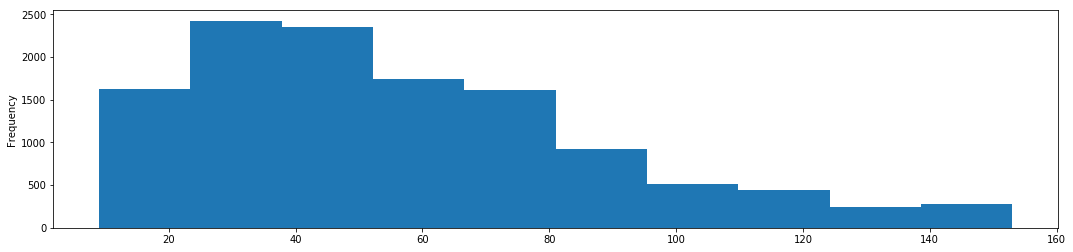

In [34]:
df['price'].plot.hist(bins=10, figsize=[18,4])

## (extra) ¿Cuales son los factores que más afectan al precio?

## Conclusiones

* ¿Qué opinas de AirBnB en Madrid?